<a href="https://colab.research.google.com/github/Tinddd28/labs-iadnmo-/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Лабораторная работа № 5 "Классификация на основе обработки текстовой информации. Сверточные и рекуррентные нейронные сети. Полносвязные сети с предобучением и дообучением."**

# 1. Начало работы: импорт библиотек, подготовка данных

Импорт библиотек

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

## Подготовка данных

Получение датасета, разделение на обучающую и валидационные выборки

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# Преобразование данных к "плоскому" (numpy) массиву
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

17464789/17464789 [==============================] - 0s 0us/step


# 2. Задание № 1. Создание двунаправленной LSTM рекуррентной сети

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(
        input_dim=10000,
        output_dim=128,
        # input_length=500,
    ),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units=64,
            activation="tanh",
            return_sequences=False,
        ),
    ),
    # tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(
        units=64,
        activation="relu",
    ),

    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid",
    )
])

In [ ]:
lstm_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"],
)

In [ ]:
callback_lstm = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        mode="max",
        patience=10,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="lstm_model.keras",
        monitor="val_acc",
        mode="max",
        save_best_only=True,
    ),
]

In [ ]:
history_lstm = lstm_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=callback_lstm,
)

Epoch 1/10
625/625 [==============================] - 292s 462ms/step - loss: 0.4414 - acc: 0.7910 - val_loss: 0.3671 - val_acc: 0.8430
Epoch 2/10
625/625 [==============================] - 286s 457ms/step - loss: 0.2549 - acc: 0.9007 - val_loss: 0.3682 - val_acc: 0.8582
Epoch 3/10
625/625 [==============================] - 284s 455ms/step - loss: 0.1748 - acc: 0.9379 - val_loss: 0.3746 - val_acc: 0.8590
Epoch 4/10
625/625 [==============================] - 284s 455ms/step - loss: 0.1408 - acc: 0.9492 - val_loss: 0.4477 - val_acc: 0.8450
Epoch 5/10
625/625 [==============================] - 284s 454ms/step - loss: 0.0924 - acc: 0.9686 - val_loss: 0.4513 - val_acc: 0.8652
Epoch 6/10
625/625 [==============================] - 284s 455ms/step - loss: 0.0731 - acc: 0.9761 - val_loss: 0.5027 - val_acc: 0.8658
Epoch 7/10
625/625 [==============================] - 284s 454ms/step - loss: 0.0787 - acc: 0.9721 - val_loss: 0.4977 - val_acc: 0.8562
Epoch 8/10
625/625 [============================

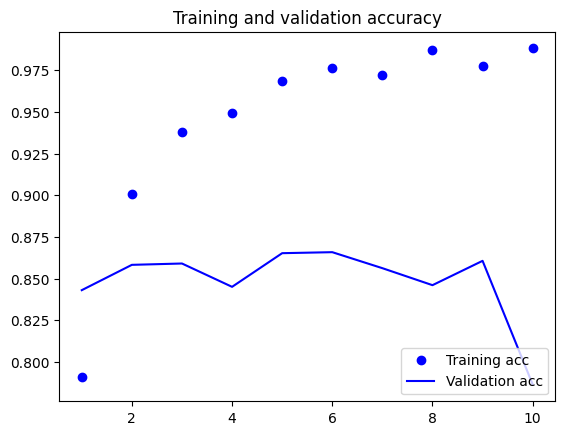

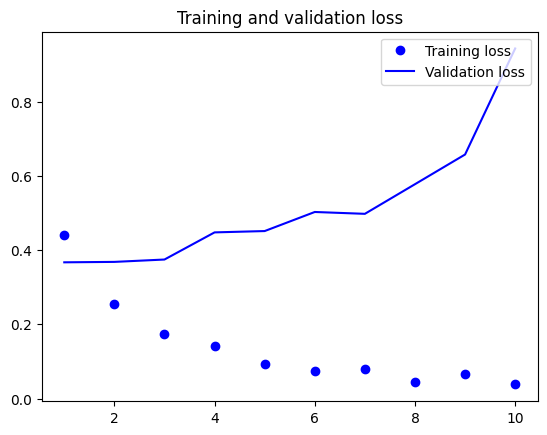

In [ ]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
best_model_lstm = tf.keras.models.load_model("lstm_model.keras")

In [ ]:
loss, accuracy = best_model_lstm.evaluate(x_test, y_test)
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")

pred = best_model_lstm.predict(x_test)
pred_classes = (pred * 0.5).astype(int)

report = metrics.classification_report(y_test, pred_classes, target_names=["negative", "positive"])
print(report)

782/782 [==============================] - 83s 107ms/step - loss: 0.5225 - acc: 0.8580
Loss: 0.523
Accuracy: 0.858
782/782 [==============================] - 83s 106ms/step
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67     12500
    positive       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred_probs = lstm_model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(y_test, y_pred)
print("Тестовая")
print(f"F1 Score (общая): {f1:.4f}")

# F1 метрика для каждого класса
report = metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)


print("обучающая")
# Получение предсказаний
y_pred_probs = lstm_model.predict(x_train)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(y_train, y_pred)
print(f"F1 Score (общая): {f1:.4f}")
report = metrics.classification_report(y_train, y_pred, target_names=['Negative', 'Positive'])
print(report)

782/782 [==============================] - 80s 102ms/step
Тестовая
F1 Score (общая): 0.8149
              precision    recall  f1-score   support

    Negative       0.89      0.66      0.76     12500
    Positive       0.73      0.92      0.81     12500

    accuracy                           0.79     25000
   macro avg       0.81      0.79      0.79     25000
weighted avg       0.81      0.79      0.79     25000

обучающая
782/782 [==============================] - 83s 106ms/step
F1 Score (общая): 0.9037
              precision    recall  f1-score   support

    Negative       0.98      0.81      0.89     12500
    Positive       0.84      0.98      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.91      0.90      0.89     25000
weighted avg       0.91      0.90      0.89     25000



# 3. Задание № 2. Полносвязная нейросетевая модель с предобучением без учителя с использованием автокодировщика

Функция для векторизации входных данных

In [3]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    results[i, seq] = 1
  return results

Создание обучающей выборки

In [4]:
vect_x_train = vectorize_sequences(x_train)
vect_x_test = vectorize_sequences(x_test)

vect_y_train = np.asarray(y_train).astype("float32")
vect_y_test = np.asarray(y_test).astype("float32")

x_val = vect_x_train[:10000]
part_x_train = vect_x_train[10000:]

y_val = vect_y_train[:10000]
part_y_train = vect_y_train[10000:]

In [5]:
input_dim = part_x_train.shape[1]
timesteps = 1  # Используем 1 временной шаг для упрощения

# Преобразуем входные данные в трехмерный формат для работы с LSTM
part_x_train_3d = part_x_train.reshape(part_x_train.shape[0], timesteps, input_dim)
x_val_3d = x_val.reshape(x_val.shape[0], timesteps, input_dim)
vect_x_test_3d = vect_x_test.reshape(vect_x_test.shape[0], timesteps, input_dim)

# Создаем модель автокодировщика
autoencoder = tf.keras.models.Sequential()

# Кодировщик
autoencoder.add(tf.keras.layers.LSTM(128, activation="relu", input_shape=(timesteps, input_dim), return_sequences=False))
autoencoder.add(tf.keras.layers.Dense(64, activation="relu"))  # Латентное представление

# Декодировщик
autoencoder.add(tf.keras.layers.RepeatVector(timesteps))  # Повторение временных шагов
autoencoder.add(tf.keras.layers.LSTM(128, activation="relu", return_sequences=True))
autoencoder.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(input_dim, activation="sigmoid")))

In [6]:
autoencoder.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"],
)

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               5186048   
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 64)             0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 time_distributed (TimeDist  (None, 1, 10000)          1290000   
 ributed)                                                        
                                                                 
Total params: 6583120 (25.11 MB)
Trainable params: 65831

In [7]:
callback = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_acc",
        mode="max",
        patience=20,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="autoencoder.keras",
        monitor="val_acc",
        mode="max",
        save_best_only=True,
    )
]

In [8]:
ae_history = autoencoder.fit(
    part_x_train_3d,
    part_x_train_3d,
    epochs=100,
    batch_size=64,
    validation_data=(x_val_3d, x_val_3d),
    callbacks=callback,
)

Epoch 1/100
235/235 [==============================] - 71s 291ms/step - loss: 0.1371 - acc: 0.1169 - val_loss: 0.0434 - val_acc: 0.2087
Epoch 2/100
235/235 [==============================] - 64s 275ms/step - loss: 0.0431 - acc: 0.2892 - val_loss: 0.0429 - val_acc: 0.3454
Epoch 3/100
235/235 [==============================] - 64s 272ms/step - loss: 0.0427 - acc: 0.4048 - val_loss: 0.0427 - val_acc: 0.4161
Epoch 4/100
235/235 [==============================] - 64s 273ms/step - loss: 0.0424 - acc: 0.4833 - val_loss: 0.0424 - val_acc: 0.4897
Epoch 5/100
235/235 [==============================] - 64s 271ms/step - loss: 0.0421 - acc: 0.5195 - val_loss: 0.0421 - val_acc: 0.5445
Epoch 6/100
235/235 [==============================] - 64s 272ms/step - loss: 0.0417 - acc: 0.5282 - val_loss: 0.0418 - val_acc: 0.4865
Epoch 7/100
235/235 [==============================] - 65s 275ms/step - loss: 0.0413 - acc: 0.4935 - val_loss: 0.0415 - val_acc: 0.5256
Epoch 8/100
235/235 [===========================

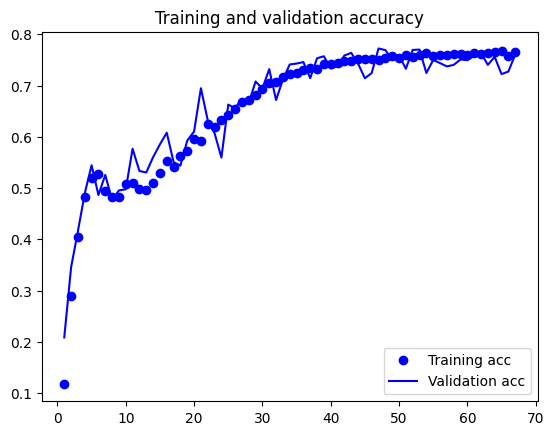

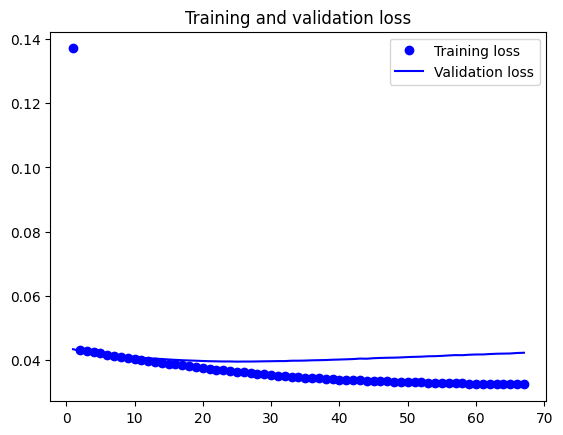

In [10]:
acc = ae_history.history['acc']
val_acc = ae_history.history['val_acc']
loss = ae_history.history['loss']
val_loss = ae_history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')

plt.show()

In [11]:
best_model_ae = tf.keras.models.load_model("autoencoder.keras")

In [14]:
loss, accuracy = best_model_ae.evaluate(vect_x_test_3d, vect_x_test_3d)
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")


782/782 [==============================] - 14s 18ms/step - loss: 0.0402 - acc: 0.7834
Loss: 0.040
Accuracy: 0.783


Создание полсновязной нейросетевой модели

In [15]:
for layer in best_model_ae.layers: # заморозка слоев автокодировщика
  layer.trainable = False

input_data = tf.keras.Input(shape=(timesteps, input_dim))
encoded_output = best_model_ae(input_data)

x = tf.keras.layers.Flatten()(encoded_output)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

full_model = tf.keras.Model(inputs=input_data, outputs=output)

full_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"]
)
full_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 10000)]        0         
                                                                 
 sequential (Sequential)     (None, 1, 10000)          6583120   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7871569 (30.03 MB)
Trainable params: 1288449 (4

In [16]:
callback = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_acc",
        mode="max",
        patience=5,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="fcnn_model.keras",
        monitor="val_acc",
        mode="max",
        save_best_only=True,
    )
]

Обучение модели

In [17]:
history_fcnn = full_model.fit(
    part_x_train_3d,
    part_y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val_3d, y_val),
    callbacks=callback,
)

Epoch 1/10
235/235 [==============================] - 20s 77ms/step - loss: 0.3368 - acc: 0.8615 - val_loss: 0.3837 - val_acc: 0.8413
Epoch 2/10
235/235 [==============================] - 17s 71ms/step - loss: 0.2689 - acc: 0.8867 - val_loss: 0.3437 - val_acc: 0.8563
Epoch 3/10
235/235 [==============================] - 17s 71ms/step - loss: 0.2325 - acc: 0.9005 - val_loss: 0.3493 - val_acc: 0.8579
Epoch 4/10
235/235 [==============================] - 17s 71ms/step - loss: 0.2011 - acc: 0.9168 - val_loss: 0.3856 - val_acc: 0.8584
Epoch 5/10
235/235 [==============================] - 17s 71ms/step - loss: 0.1727 - acc: 0.9278 - val_loss: 0.4235 - val_acc: 0.8459
Epoch 6/10
235/235 [==============================] - 17s 73ms/step - loss: 0.1447 - acc: 0.9418 - val_loss: 0.5249 - val_acc: 0.8255
Epoch 7/10
235/235 [==============================] - 18s 76ms/step - loss: 0.1226 - acc: 0.9501 - val_loss: 0.5219 - val_acc: 0.8516
Epoch 8/10
235/235 [==============================] - 18s 75ms

In [18]:
best_fcnn = tf.keras.models.load_model("fcnn_model.keras")

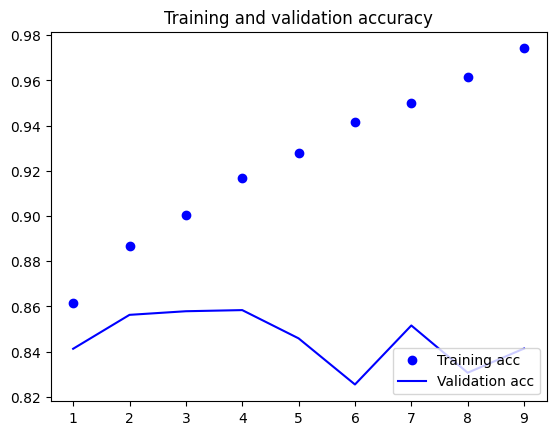

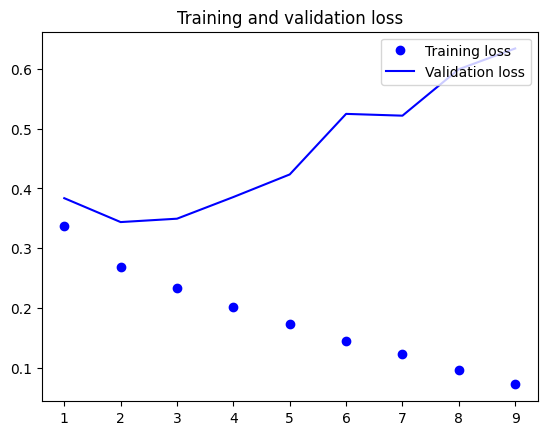

In [19]:
acc = history_fcnn.history['acc']
val_acc = history_fcnn.history['val_acc']
loss = history_fcnn.history['loss']
val_loss = history_fcnn.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')

plt.show()

In [20]:


loss, accuracy = best_fcnn.evaluate(vect_x_test_3d)
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")

pred = best_fcnn.predict(vect_x_test_3d)
pred_classes = (pred * 0.5).astype(int)

report = metrics.classification_report(vect_y_test, pred_classes)
print(report)


782/782 [==============================] - 6s 7ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Loss: 0.000
Accuracy: 0.000
782/782 [==============================] - 11s 13ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     12500
         1.0       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:

# Получение предсказаний
y_pred_probs = best_fcnn.predict(vect_x_test_3d)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(vect_y_test, y_pred)
print("Тестовая")
print(f"F1 Score (общая): {f1:.4f}")

# F1 метрика для каждого класса
report = metrics.classification_report(vect_y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)


print("Валидационная")
# Получение предсказаний
y_pred_probs = best_fcnn.predict(x_val_3d)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(y_val, y_pred)
print(f"F1 Score (общая): {f1:.4f}")

# F1 метрика для каждого класса
report = metrics.classification_report(y_val, y_pred, target_names=['Negative', 'Positive'])
print(report)

print("обучающая")
# Получение предсказаний
y_pred_probs = best_fcnn.predict(part_x_train_3d)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(part_y_train, y_pred)
print(f"F1 Score (общая): {f1:.4f}")

# F1 метрика для каждого класса
report = metrics.classification_report(part_y_train, y_pred, target_names=['Negative', 'Positive'])
print(report)

782/782 [==============================] - 10s 13ms/step
Тестовая
F1 Score (общая): 0.8421
              precision    recall  f1-score   support

    Negative       0.83      0.87      0.85     12500
    Positive       0.86      0.82      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Валидационная
313/313 [==============================] - 4s 13ms/step
F1 Score (общая): 0.8598
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4947
    Positive       0.86      0.86      0.86      5053

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

обучающая
469/469 [==============================] - 6s 13ms/step
F1 Score (общая): 0.9376
              precision    recall  f1-score   support

    Negative  

In [ ]:
# vect_x_train = vectorize_sequences(x_train)
# vect_x_test = vectorize_sequences(x_test)

# vect_y_train = np.asarray(y_train).astype("float32")
# vect_y_test = np.asarray(y_test).astype("float32")

# x_val = vect_x_train[:10000]
# part_x_train = vect_x_train[10000:]

# y_val = vect_y_train[:10000]
# part_y_train = vect_y_train[10000:]
# part_x_train_3d = part_x_train.reshape(part_x_train.shape[0], timesteps, input_dim)
# x_val_3d = x_val.reshape(x_val.shape[0], timesteps, input_dim)
# vect_x_test_3d = vect_x_test.reshape(vect_x_test.shape[0], timesteps, input_dim)
#